In [33]:
from sklearn import model_selection, datasets, metrics, tree, ensemble

import numpy as np

In [3]:
data, target = datasets.load_digits(return_X_y=True)

In [6]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
# 1
model_1 = tree.DecisionTreeClassifier()
model_1.fit(data,  target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
res1 = model_selection.cross_val_score (model_1, data, target, cv = 10).mean()
with open("random_forest_hw_1.txt", "w") as fout:
        fout.write(str(res1))
print (res1)

0.8291309745499689


In [40]:
# 2 
model_2 = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(), n_estimators = 100)
model_2.fit(data,  target)

0.9231564245810056


In [44]:
res2 = model_selection.cross_val_score (model_2, data, target, cv = 10).mean()
with open("random_forest_hw_2.txt", "w") as fout:
        fout.write(str(res2))
print (res2)

0.9214835505896961


In [50]:
# 3
model_3 = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(), n_estimators = 100,max_features=int(np.sqrt(data.shape[1])))
model_3.fit(data,  target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [52]:
res3 = model_selection.cross_val_score (model_3, data, target, cv = 10).mean()
with open("random_forest_hw_3.txt", "w") as fout:
        fout.write(str(res3))
print (res3)

0.9310024829298571


In [53]:
# 3
model_4 = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(max_features='sqrt'), n_estimators = 100)
model_4.fit(data,  target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None

In [54]:
res4 = model_selection.cross_val_score (model_4, data, target, cv = 10).mean()
with open("random_forest_hw_4.txt", "w") as fout:
        fout.write(str(res4))
print (res4)

0.9510055865921787


In [55]:
# 5

model_5 = ensemble.RandomForestClassifier()
model_5.fit(data,  target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
res5 = model_selection.cross_val_score (model_5, data, target, cv = 10).mean()
with open("random_forest_hw_5.txt", "w") as fout:
        fout.write(str(res5))
print (res5)

0.9465611421477342


In [71]:
num_trees = [5, 10, 15, 25, 50, 100, 200]
num_trees
res = []
for N in num_trees:
    model = ensemble.RandomForestClassifier(n_estimators = N)
    model.fit(data,  target)
    result = model_selection.cross_val_score (model, data, target, cv = 10).mean()
    res.append(result)
res

[0.8864835505896957,
 0.9193202979515828,
 0.9321135940409683,
 0.9398820608317815,
 0.9415642458100558,
 0.9504748603351955,
 0.9499130974549969]

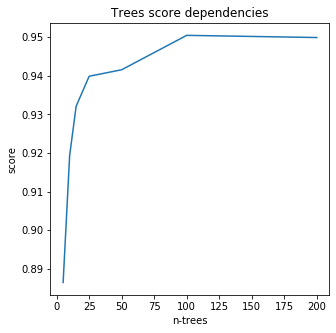

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(num_trees, res)
plt.xlabel("n-trees")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

In [76]:
data.shape

(1797, 64)

In [83]:
num_features = [2, 5, 10, 20, 35, 50]
res = []
for N in num_features:
    model = ensemble.RandomForestClassifier(max_features = int(N))
    model.fit(data,  target)
    result = model_selection.cross_val_score (model, data, target, cv = 10).mean()
    res.append(result)
res

[0.9482402234636871,
 0.9521384233395406,
 0.9499037864680322,
 0.9409962756052141,
 0.9426567349472377,
 0.9331905648665424]

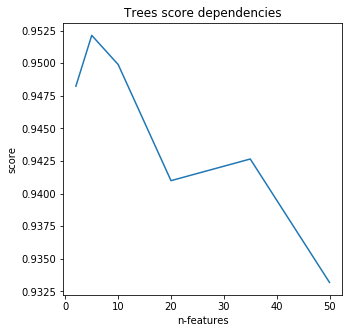

In [84]:
plt.figure(figsize=(5, 5))
plt.plot(num_features, res)
plt.xlabel("n-features")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

In [85]:
num_depth = [1, 2, 5, 10, 15, 25, 50, 64]
res = []
for N in num_depth:
    model = ensemble.RandomForestClassifier(max_depth = N)
    model.fit(data,  target)
    result = model_selection.cross_val_score (model, data, target, cv = 10).mean()
    res.append(result)
res

[0.7089478584729981,
 0.792951582867784,
 0.9114928615766607,
 0.9432309124767224,
 0.9493513345747981,
 0.951024208566108,
 0.9465611421477342,
 0.9487957790192427]

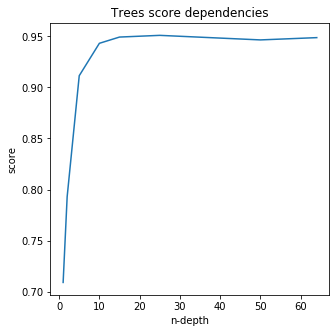

In [86]:
plt.figure(figsize=(5, 5))
plt.plot(num_depth, res)
plt.xlabel("n-depth")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

In [87]:
with open("random_forest_hw_5.txt", "w") as fout:
        fout.write(str('2 3 4 7'))